# Effects of User Features on The Duration of Bike Rides

# By Ezemonye Ordu Omereji

## Investigation Overview

This part of the investigation focuses on the features of users that could impact on the duration of bike rides such as Age, Type, Gender and Status.

## Dataset Overview

The dataset comprises of comprises of 183,412 records of bike trips, with a total of 16 features (duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip)

In [2]:
# importing prerequisite packages and setting the inline property
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# read in the data into a pandas dataframe
bike_sharing = pd.read_csv('fordgobike_tripdata.csv')


In [4]:
# Data wrangling, removing users with inconsistent data
bike_sharing = bike_sharing.dropna()
bike_sharing = bike_sharing.reset_index(drop=True)

In [5]:
# correcting dtypes
bike_sharing['start_time'] = pd.to_datetime(bike_sharing['start_time'])
bike_sharing['end_time'] = pd.to_datetime(bike_sharing['end_time'])

bike_sharing['start_station_id'] = bike_sharing['start_station_id'].astype('str')
bike_sharing['end_station_id'] = bike_sharing['end_station_id'].astype('str')

bike_sharing['bike_id'] = bike_sharing['bike_id'].astype('str')

# change user_type and member_gender to expected category type
bike_sharing['user_type'] = bike_sharing['user_type'].astype('category')
bike_sharing['member_gender'] = bike_sharing['member_gender'].astype('category')

# drop irrelevant columns with latitudes and longitudes
bike_sharing.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# convert duration of trips(seconds) to minutes, start trip date to 'yyyy-mm-dd' format, extract daily trip hour time and week day into new columns
bike_sharing['duration_minutes'] = bike_sharing['duration_sec']/60
bike_sharing['start_hour'] = bike_sharing.start_time.dt.strftime('%H')
bike_sharing['day_of_week'] = bike_sharing.start_time.dt.strftime('%A')

#dropping the duration by seconds column
bike_sharing.drop(['duration_sec'], axis=1, inplace=True)
#age of users
bike_sharing['user_age'] = 2019 - bike_sharing['member_birth_year']

# add user age column
bike_sharing['user_age'] = bike_sharing['user_age'].astype('int') #change dtype for user_age

In [6]:
bike_sharing.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minutes', 'start_hour', 'day_of_week', 'user_age'],
      dtype='object')

In [7]:
# convert start_hour, day_of_week into ordered categorical types
bike_start_hour = {'start_hour': ['0','1','2','3','4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']}
bike_week_day = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',]}

# function for ordered categories
def convert_to_cat(cat_):
    for var in cat_:
        ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_[var])
        bike_sharing[var] = bike_sharing[var].astype(ordered_cat)
        
convert_to_cat(bike_start_hour)
convert_to_cat(bike_week_day)

## User Age Distribution
The Age of users is an important feature which can have immense effect of how the system is used. Ages between 20 and 40 are observed to be more frequent with using the bike ride system. 

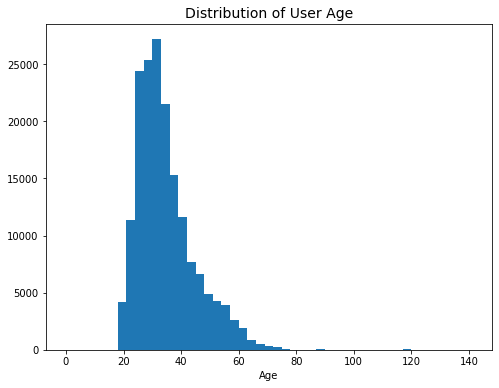

In [8]:
binsize = 3
bins = np.arange(0, bike_sharing['user_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bike_sharing, x = 'user_age', bins = bins) 
plt.xlabel('Age')
plt.title('Distribution of User Age', fontsize=14)
plt.show();

## User Type vs Daily Usage
The Subscriber type of users had much more trips than the Customers. This is in relation that the system had more Subscribers than Customers. THursdays had over 30,000 trips while weekend days were far less than half of it. 

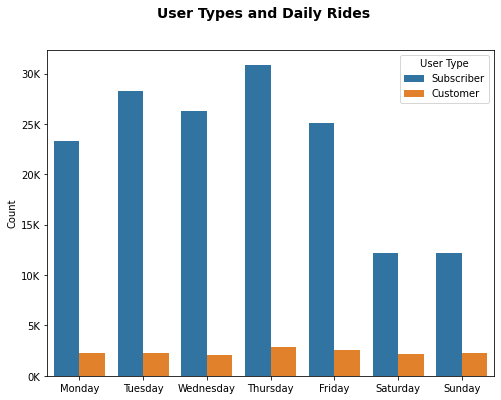

In [9]:
plt.figure(figsize=[8, 6])

val_sorted = bike_sharing.user_type.value_counts()/bike_sharing.shape[0]
ax = sb.countplot(data=bike_sharing, x='day_of_week', hue='user_type', hue_order=val_sorted.index);

ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

ax.legend(title='User Type')
plt.xlabel('')
plt.ylabel('Count')
plt.suptitle('User Types and Daily Rides', fontsize=14, weight='bold');

## User Age vs Ride Duration vs Gender
Maximum duration of trips were seen around users between 20 and 40 years of age. As age increases, users spend lesser time on bikes.

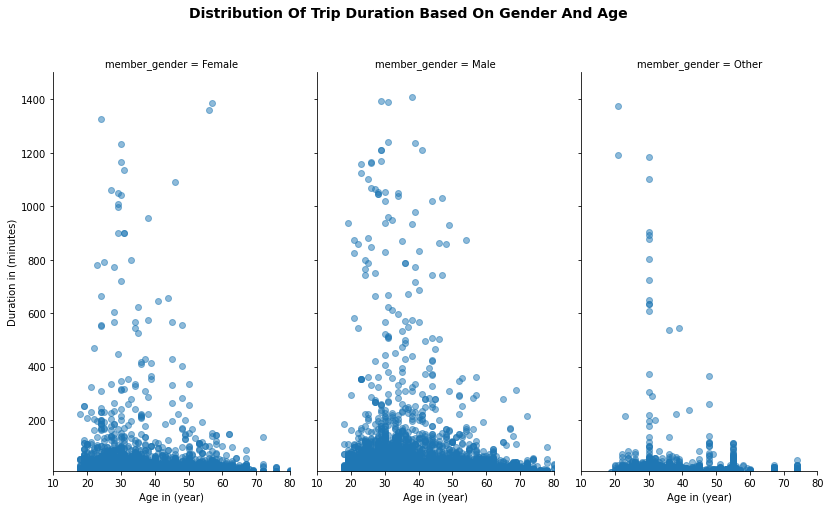

In [11]:
#visualizing ride duration based of ages of members
gender = sb.FacetGrid(data=bike_sharing, col='member_gender', 
                     xlim= [10, 80], ylim = [10, 1500])
gender.map(plt.scatter, 'user_age', 'duration_minutes', alpha=0.5)
gender.set_xlabels('Age in (year)')
gender.set_ylabels('Duration in (minutes)')

plt.suptitle('Distribution of trip duration based on gender and age'.title(), 
            y=1, fontsize = 14, weight = 'bold')

#set plot size
gender.fig.set_size_inches(12, 8)
plt.show();